<a href="https://colab.research.google.com/github/Sarinda251/CAP_5415/blob/main/HW3_PART2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Binary Classification

##Algorithm

In [34]:
# binary thresholding algorithm
def bin_thresh(filepath, val):
  img = cv2.imread(filepath,0)
  res = np.zeros(img.shape)
  for i in range(len(img)):
    for j in range(len(img[0])):
      if img[i][j] >= val:
        res[i][j] = 255
  return res

In [35]:
def part1(filepath):
  # original image 
  print("original image\n")
  cv2_imshow(cv2.imread(filepath,1))
  # read img
  img = cv2.imread(filepath,0)
  # black and white img
  print("grayscaled image\n")
  cv2_imshow(img)

  # 1d array of vals for easy histogram use
  histvals = img.reshape(1,65536)[0]

  # histogram of values
  plt.hist(histvals, bins=256)
  print("\n")
  print("histogram\n")
  plt.show()

##Results

In [36]:
# filenames
path1 = "test1.png"
path2 = "test2.png"
path3 = "test3.png"

###Image 1

original image



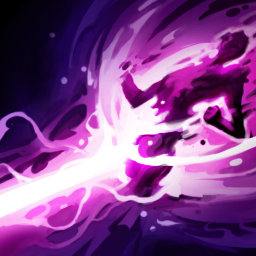

grayscaled image



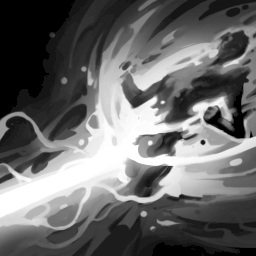



histogram



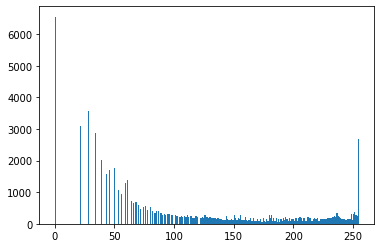

In [37]:
# print image and histogram
part1(path1)

Threshold: 10


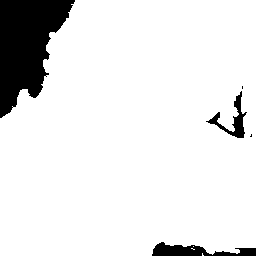



Threshold: 80


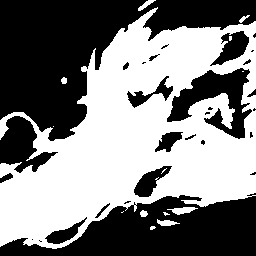



Threshold: 150


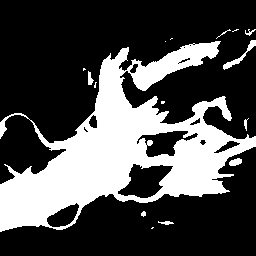

In [38]:
# threshold values
t1 = 10
t2 = 80
t3 = 150
print("Threshold: " + str(t1))
cv2_imshow(bin_thresh(path1,t1))
print("\n")
print("Threshold: " + str(t2))
cv2_imshow(bin_thresh(path1,t2))
print("\n")
print("Threshold: " + str(t3))
cv2_imshow(bin_thresh(path1,t3))

###Image 2

original image



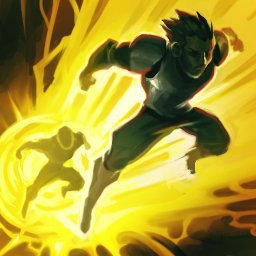

grayscaled image



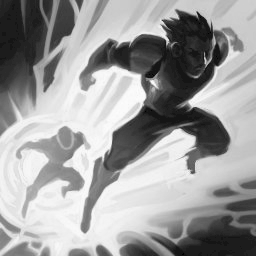



histogram



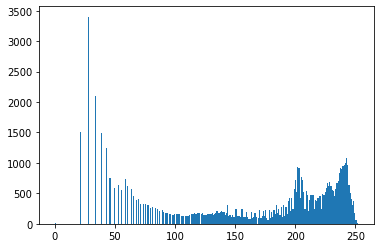

In [39]:
# print image and histogram
part1(path2)

Threshold: 50


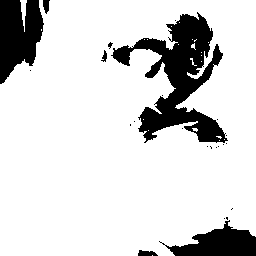



Threshold: 100


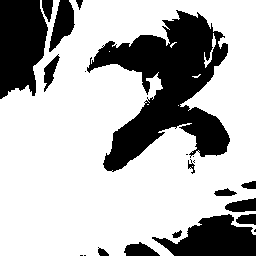



Threshold: 175


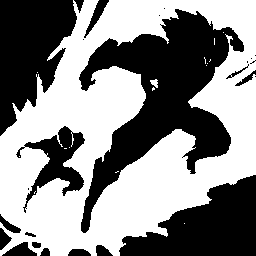

In [40]:
# threshold values
t1 = 50
t2 = 100
t3 = 175
print("Threshold: " + str(t1))
cv2_imshow(bin_thresh(path2,t1))
print("\n")
print("Threshold: " + str(t2))
cv2_imshow(bin_thresh(path2,t2))
print("\n")
print("Threshold: " + str(t3))
cv2_imshow(bin_thresh(path2,t3))

### Image 3

original image



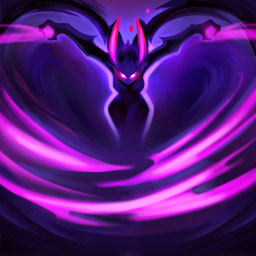

grayscaled image



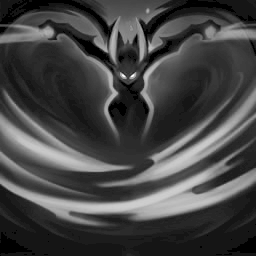



histogram



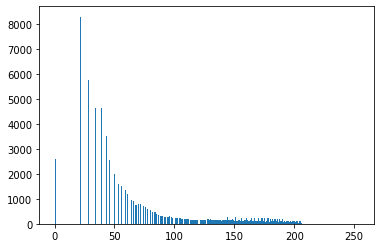

In [41]:
# print image and histogram
part1(path3)

Threshold: 50


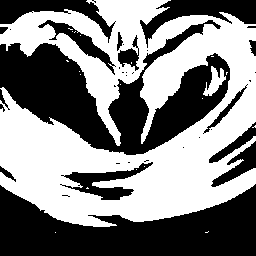



Threshold: 80


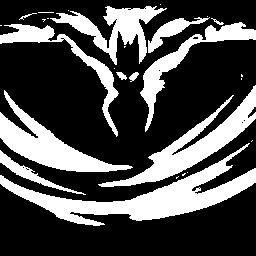



Threshold: 130


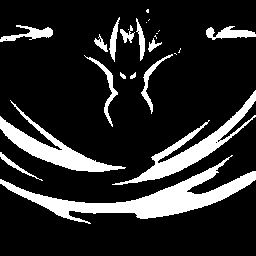

In [42]:
# threshold values
t1 = 50
t2 = 80
t3 = 130
print("Threshold: " + str(t1))
cv2_imshow(bin_thresh(path3,t1))
print("\n")
print("Threshold: " + str(t2))
cv2_imshow(bin_thresh(path3,t2))
print("\n")
print("Threshold: " + str(t3))
cv2_imshow(bin_thresh(path3,t3))

# Otsu

## Algorithm

In [43]:
def Otsu(filepath):
  # original image 
  print("original image\n")
  cv2_imshow(cv2.imread(filepath,1))
  # read img
  img = cv2.imread(filepath,0)
  # black and white img
  print("grayscaled image\n")
  cv2_imshow(img)

  # 1d array of vals for easy histogram use
  histvals = img.reshape(1,65536)[0]
  maxval = max(histvals)

  # create histogram
  [hist, _] = np.histogram(img, bins=256, range=(0, 255))
  # convert histogram elements into probabilities
  hist = 1.0*hist/np.sum(hist)
  
  # otsu variable initialization
  Gmax = maxval
  T0 = 1
  u = T0
  T = u
  Smax = 0

  # algorithm from class lecture
  while u < Gmax:
    cI = np.sum(hist[:u])
    P1 = np.sum(hist[:u])
    P2 = 1 - P1
    mu1 = np.sum(np.array([i * hist[i] for i in range(u + 1)]))/P1
    mu2 = np.sum(np.array([i * hist[i] for i in range(u + 1, Gmax + 1)]))/P2
    sigSquared = cI * (1 - cI) * (mu1 - mu2) * (mu1 - mu2)

    if sigSquared > Smax:
      Smax = sigSquared
      T = u
    u = u + T0 
  
  # threshold values
  print("\nOtsu threshold: " + str(T))
  cv2_imshow(bin_thresh(filepath,T))

## Testing

###Image 1

original image



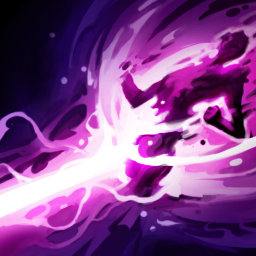

grayscaled image



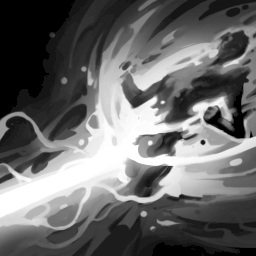


Otsu threshold: 121


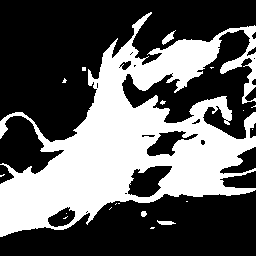

In [44]:
Otsu(path1)

###Image 2

original image



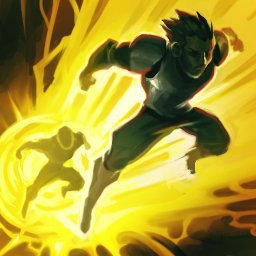

grayscaled image



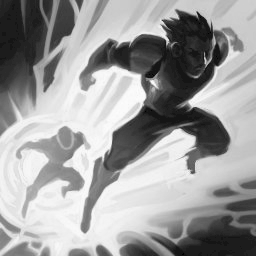


Otsu threshold: 121


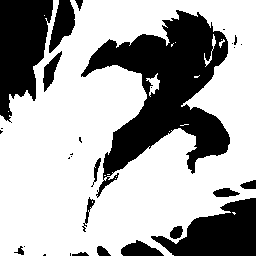

In [45]:
Otsu(path2)

###Image 3

original image



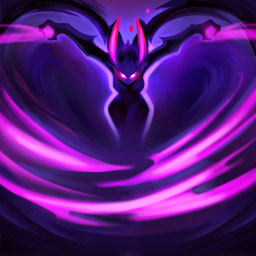

grayscaled image



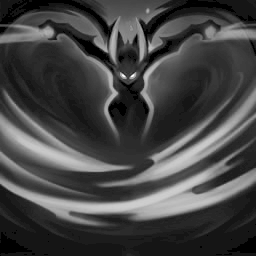


Otsu threshold: 94


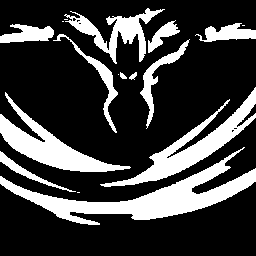

In [46]:
Otsu(path3)